# EDA básico:
1. CONAPO.
2. Delitos.
3. Enucesta de la INEGI.

- Relacionar fecha con num delitos, con territorio, con tipo delito
- Observar los estados/ciudades con más narcotrafico y sus delitos
- Evolución de los delitos en el tiempo (por año)

In [1]:
# Importando las librerías...

# Manejar rutas
from pathlib import Path

# Cargar y transformar datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import plotly.graph_objects as go
from plotly.subplots import make_subplots

%matplotlib widget
%matplotlib inline

# Manejo de valores faltantes
import missingno as msno

In [2]:
# Establecer las rutas para acceder a los datos tidy...
data_path = Path('../data')
tidy_data_path = Path(data_path / 'tidy')

# 1. CONAPO.
Se mostrarán gráficos sobre:
- Tamaños de poblaciones.
- Pirámides poblacionales.

Con el objetivo de entender la composición de las poblaciones que se van a estudiar. Y luego establecer comparaciones entre estos tamaños de población y los índices delictivos, y KPIs del trabajo.

In [3]:
# Carga del Tidy...
df_conapo = pd.read_csv(tidy_data_path / "proyecciones_conapo.csv")

In [4]:
# Analizando los Datos...
df_conapo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65340 entries, 0 to 65339
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   AÑO        65340 non-null  int64 
 1   ENTIDAD    65340 non-null  object
 2   CVE_GEO    65340 non-null  int64 
 3   EDAD       65340 non-null  int64 
 4   GRUPO      65340 non-null  object
 5   SEXO       65340 non-null  object
 6   POBLACION  65340 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 3.5+ MB


In [5]:
df_conapo

,AÑO,ENTIDAD,CVE_GEO,EDAD,GRUPO,SEXO,POBLACION
0,2015,República Mexicana,0,0,0 a 4,Hombres,1134441
1,2015,República Mexicana,0,0,0 a 4,Mujeres,1093705
2,2015,República Mexicana,0,1,0 a 4,Hombres,1138096
3,2015,República Mexicana,0,1,0 a 4,Mujeres,1097638
4,2015,República Mexicana,0,2,0 a 4,Hombres,1145745
...,...,...,...,...,...,...,...
65335,2023,Zacatecas,32,107,85 y más,Mujeres,2
65336,2023,Zacatecas,32,108,85 y más,Hombres,2
65337,2023,Zacatecas,32,108,85 y más,Mujeres,0
65338,2023,Zacatecas,32,109,85 y más,Hombres,1


In [6]:
df_piramides = df_conapo.copy()

entidades = df_piramides["ENTIDAD"].unique()
entidades = list(entidades[1:33])

grupos_etarios = list(df_piramides["GRUPO"].unique())
grupos_etarios.reverse()

In [7]:
# Consultar la población de de todos los años desde el 2016 al 2023...
def df_pob_por_anhos(filtro_anho):
    pob_anho = (df_piramides.loc[(df_piramides["AÑO"] == filtro_anho) & (df_piramides["CVE_GEO"] != 0),
                                 ["AÑO","ENTIDAD", "CVE_GEO", "POBLACION"]].groupby(["AÑO","ENTIDAD", "CVE_GEO"]).sum())
    
    #print(f"Población del año {filtro_anho} - Todas las Unidades Federeativas...")
    
    return pob_anho.reset_index().sort_values("POBLACION", ascending = False)

widgets.interact(df_pob_por_anhos, filtro_anho = df_piramides["AÑO"].unique())

interactive(children=(Dropdown(description='filtro_anho', options=(2015, 2016, 2017, 2018, 2019, 2020, 2021, 2…

<function __main__.df_pob_por_anhos(filtro_anho)>

In [8]:
# Crear el gráfico de columnas horizontales
def graf_pob_por_anhos(filtro_anho):
    plt.figure(figsize=(8, 10))
    sns.barplot(x='POBLACION', y='ENTIDAD', data = df_pob_por_anhos(filtro_anho), palette='viridis')

    # Ajustar etiquetas y título
    plt.xlabel('Población (Millones de habitantes)')
    plt.ylabel('Entidades Federativas')
    plt.title(f'Población según Entidades. Año: {filtro_anho}')

    # Mostrar el gráfico
    plt.show()

widgets.interact(graf_pob_por_anhos, filtro_anho = df_piramides["AÑO"].unique())

interactive(children=(Dropdown(description='filtro_anho', options=(2015, 2016, 2017, 2018, 2019, 2020, 2021, 2…

<function __main__.graf_pob_por_anhos(filtro_anho)>

In [9]:
# Asé se ve el Df que necesitamos para las pirámides...
for i, entidad in enumerate(entidades):
    df_pob_mexico = (df_piramides.loc[(df_piramides["AÑO"] == 2023) & (df_piramides["ENTIDAD"] == "República Mexicana"), ["GRUPO", "SEXO", "POBLACION"]].groupby(["GRUPO", "SEXO"]).sum())

df_pob_mexico = df_pob_mexico.pivot_table(index="GRUPO",columns="SEXO",values="POBLACION").reset_index()
df_pob_mexico["Total"] = df_pob_mexico["Hombres"] + df_pob_mexico["Mujeres"]
#df_pob_mexico["Mujeres"] *= -1
print("República Mexicana")
df_pob_mexico

República Mexicana


SEXO,GRUPO,Hombres,Mujeres,Total
0,0 a 4,5302794,5111446,10414240
1,10 a 14,5755183,5548855,11304038
2,15 a 19,5699745,5565159,11264904
3,20 a 24,5656809,5589713,11246522
4,25 a 29,5456502,5462331,10918833
5,30 a 34,5128604,5269345,10397949
6,35 a 39,4461141,4853878,9315019
7,40 a 44,3794214,4452137,8246351
8,45 a 49,3639280,4239229,7878509
9,5 a 9,5480803,5281378,10762181


In [10]:
# Para Pirámide poblacional... crear escalas...
def crear_escala(max_pob):
    """
    Para crear ticks vals y labels para las escalas según tamaño de la población...
    """
    max_pob = (max_pob // 4) * 5
    step_exacto = max_pob // 4
    pow = len(str(step_exacto)) - 1
    
    step_round = (step_exacto // 10**pow) * 10 ** pow
    
    vals = list(set(list(np.arange(0,max_pob,step_round))) | set(list(np.arange(0,max_pob,step_round)*(-1))))
    vals.sort()
    
    if max(vals) // 1000 > 1000:
        labels = [str((label // 1000000)) + "M" for label in vals]
    else:
        labels = [str((label // 1000)) + "K" for label in vals]
    return vals, labels

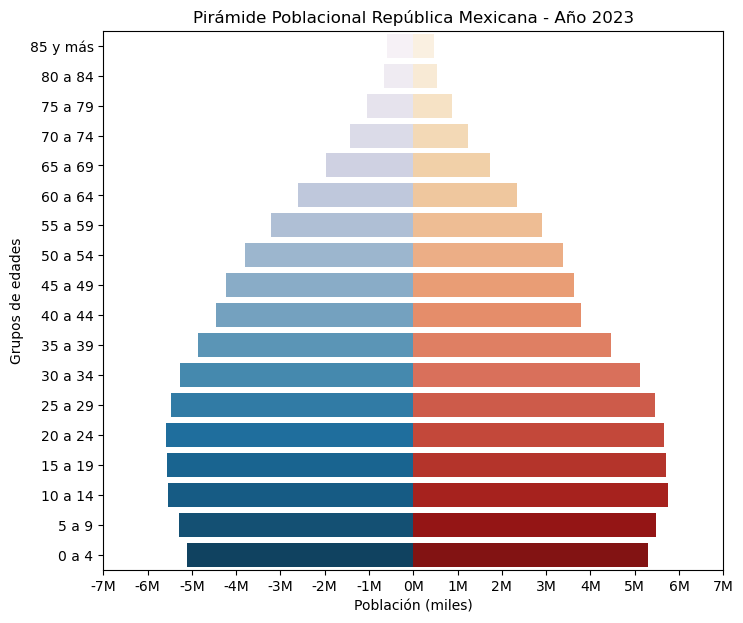

In [11]:
# Pirámide de toda la "República Mexicana"...
max_pob = df_pob_mexico[["Hombres", "Mujeres"]].max().max()

df_pob_mexico["Mujeres"] *= -1

ticks, labels = crear_escala(max_pob)

# Crear el Gráfico...
fig, ax = plt.subplots(figsize=(8, 7))
bar_plot = sns.barplot(x='Hombres', y='GRUPO', data=df_pob_mexico, order=grupos_etarios, orient='h', palette='OrRd')
bar_plot = sns.barplot(x='Mujeres', y='GRUPO', data=df_pob_mexico, order=grupos_etarios, orient='h', palette='PuBu', lw=0)
bar_plot.set(title=f'Pirámide Poblacional República Mexicana - Año 2023',
             xlabel="Población (miles)",
             ylabel="Grupos de edades",
             xticks=ticks,
             xticklabels=labels)

plt.show()

En la misma se puede notar que se trata de una población en fase de envejecimiento. Esta precisamente es la forma más común en todo México.

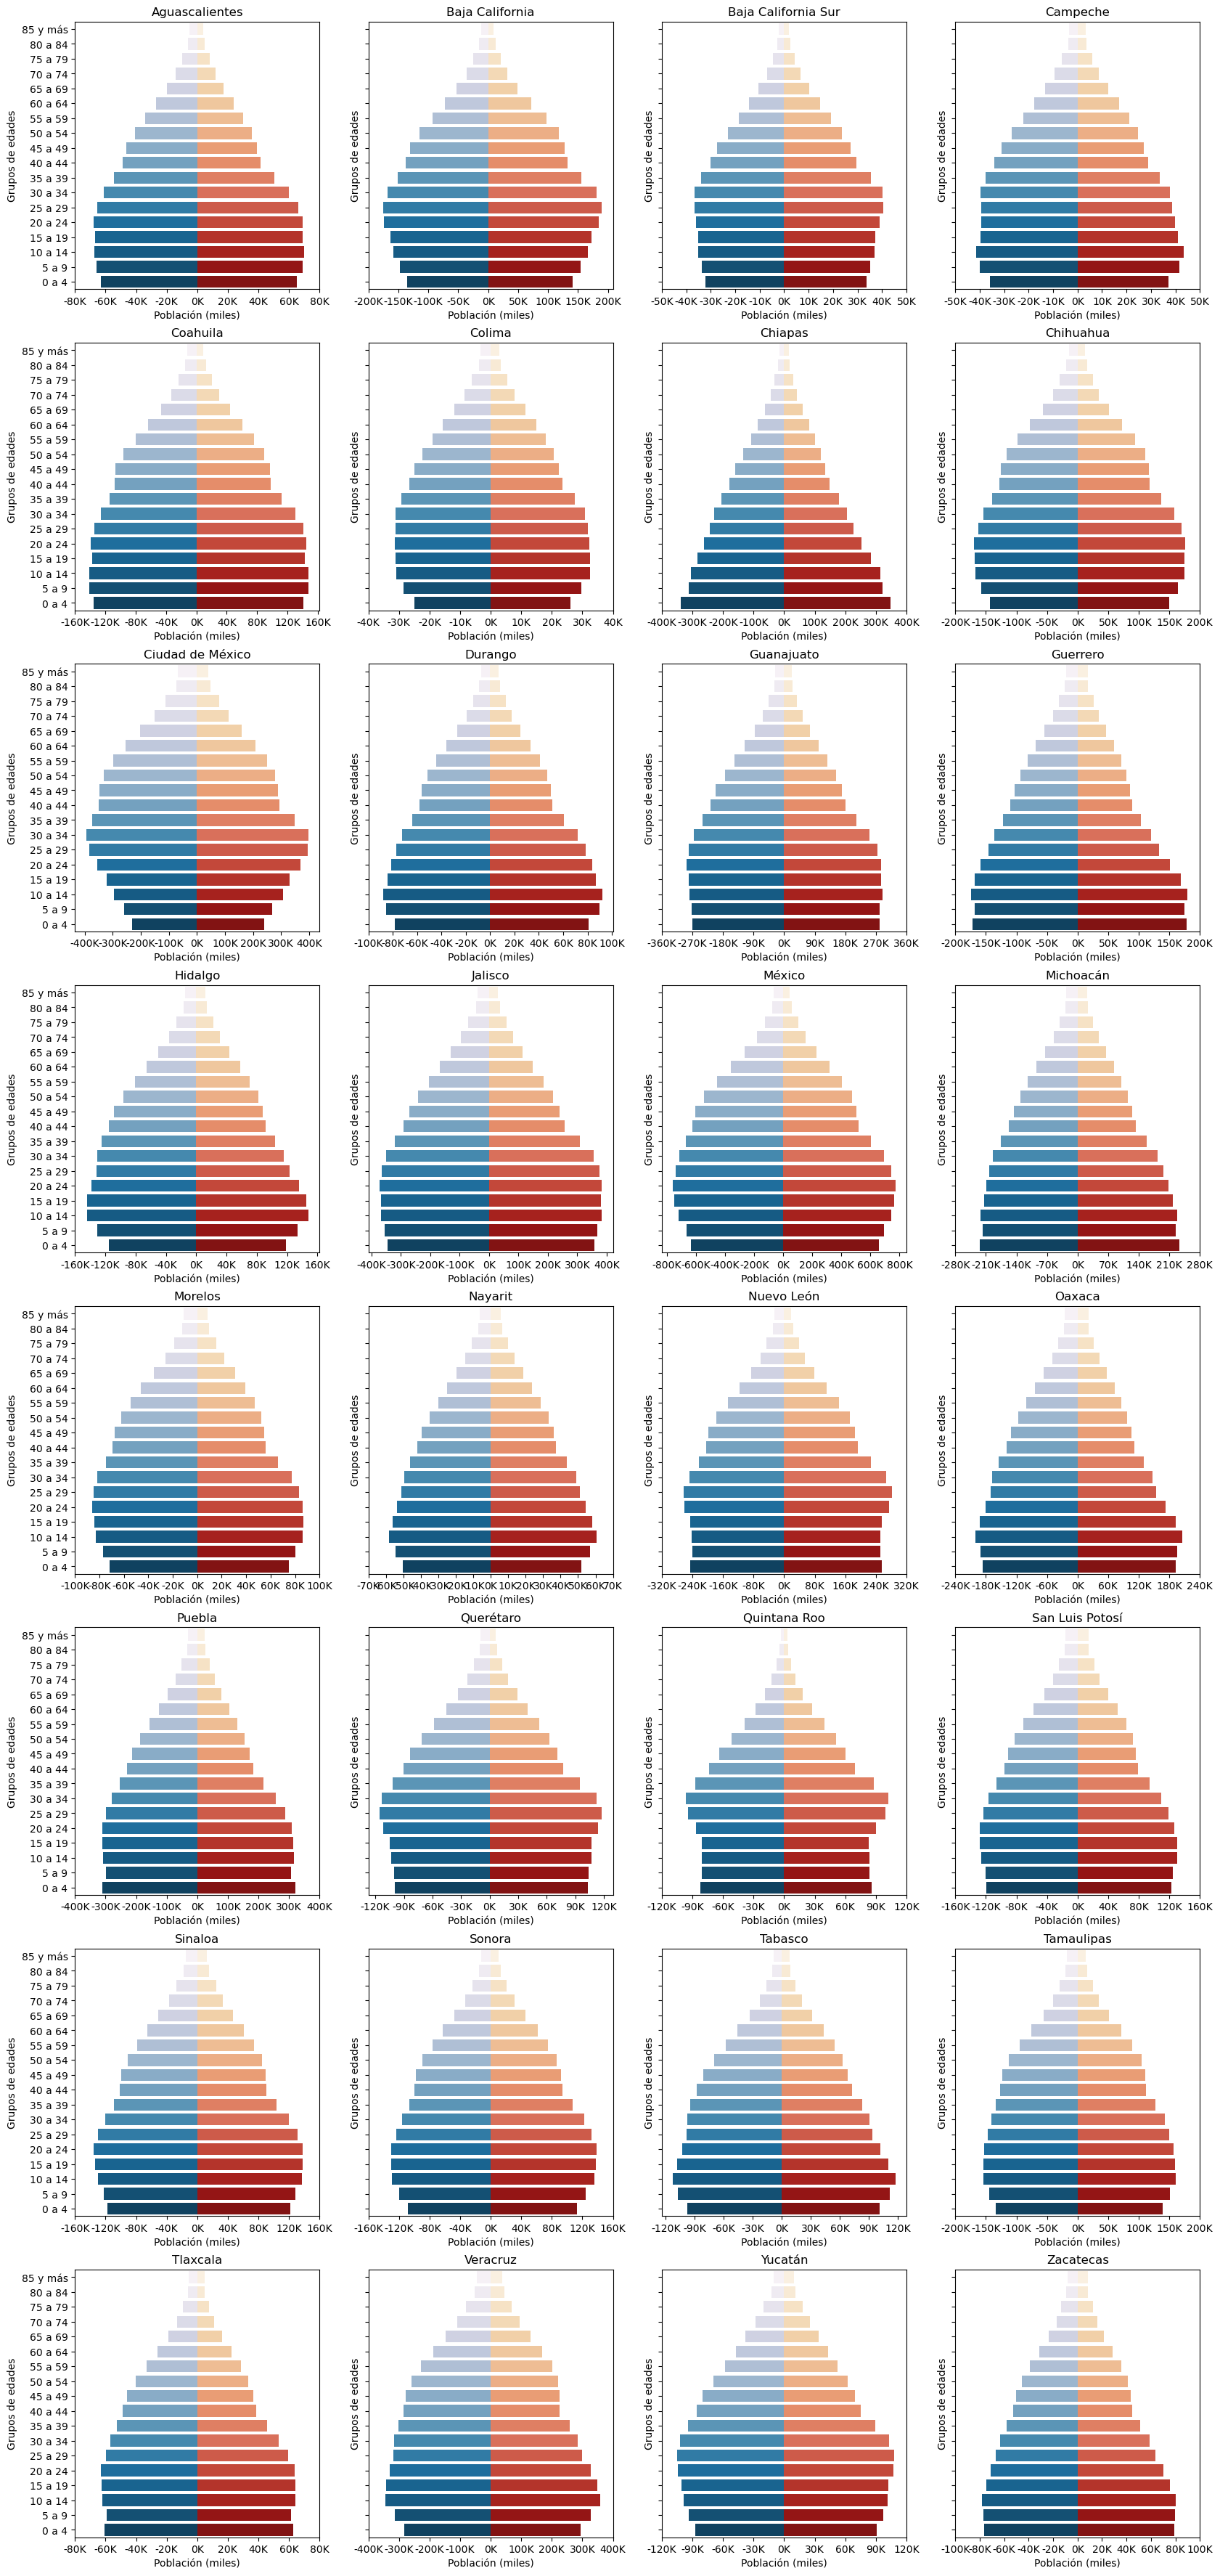

In [12]:
# Graficando la pirámide poblacional de cada entidad Federativa...
fig, axes = plt.subplots(8, 4, figsize=(20, 45), sharey=True)

for i, entidad in enumerate(entidades):
    df_pob_graf = (df_piramides.loc[(df_piramides["AÑO"] == 2023) & (df_piramides["ENTIDAD"] == entidad), ["GRUPO", "SEXO", "POBLACION"]].groupby(["GRUPO", "SEXO"]).sum())
    
    df_pob_graf = df_pob_graf.pivot_table(index="GRUPO",columns="SEXO",values="POBLACION").reset_index()
    
    max_pob = df_pob_graf[["Hombres", "Mujeres"]].max().max()
    ticks, labels = crear_escala(max_pob)
    
    df_pob_graf["Mujeres"] *= -1

    # Crear el Gráfico...
    bar_plot = sns.barplot(x='Hombres', y='GRUPO', data=df_pob_graf, order=grupos_etarios, orient='h', ax=axes[(i//4),(i - (4 * (i//4)))], palette='OrRd')
    bar_plot = sns.barplot(x='Mujeres', y='GRUPO', data=df_pob_graf, order=grupos_etarios, orient='h', ax=axes[(i//4),(i - (4 * (i//4)))], palette='PuBu', lw=0)
    bar_plot.set(title=entidad,
                xlabel="Población (miles)",
                ylabel="Grupos de edades",
                xticks = ticks,
                xticklabels = labels)

plt.show()


Estados como Chiapas y Zacatecas muestras un crecimiento rápido. Otros como Durando, Guerrero, Michoacán, Oaxaca, Puebla, Tlaxcala muestran un crecimiento demográfico más lento, mientras que el resto de los estados se encuentran en fase de envejecimiento para el presente 2023.
Pudieran aparecer relaciones entre los altos índices de inseguridad y la fase o etapa demográfica.

# 2. Semáforo delictivo.

Contar los delitos por modalidad y representarlos graficamente en por cientos.

Describir un poco la muestra.

In [13]:
# Carga del Tidy...
df_delitos = pd.read_csv(tidy_data_path / "delitos_semaforo.csv", encoding = 'iso-8859-1')

In [14]:
df_delitos

,anio,clave_ent,entidad,clave_municipio,municipio,bien_afectado,tipo_delito,subtipo_delito,delito_semaforo,modalidad,...,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre,total
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Homicidios,Con arma de fuego,...,1,0,1,1,0,2,1,0,1,9
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Homicidios,Con arma blanca,...,0,0,1,0,1,0,0,0,0,3
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Homicidios,Con otro elemento,...,1,3,2,0,1,2,0,0,0,9
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Homicidios,No especificado,...,1,0,0,0,0,0,0,0,0,2
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Lesiones,Lesiones dolosas,Lesiones,Con arma de fuego,...,1,1,1,3,2,1,3,2,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656606,2023,32,Zacatecas,32058,Santa María de la Paz,El patrimonio,Robo,Robo a negocio,Robo a negocio,Con violencia,...,0,0,0,0,0,0,0,0,0,0
656607,2023,32,Zacatecas,32058,Santa María de la Paz,El patrimonio,Robo,Robo a negocio,Robo a negocio,Sin violencia,...,0,0,0,0,0,0,0,0,0,0
656608,2023,32,Zacatecas,32058,Santa María de la Paz,El patrimonio,Extorsión,Extorsión,Extorsión,Extorsión,...,0,0,0,0,0,0,0,0,0,0
656609,2023,32,Zacatecas,32058,Santa María de la Paz,La familia,Violencia familiar,Violencia familiar,Violencia familiar,Violencia familiar,...,1,0,0,0,0,0,0,0,0,1


In [15]:
def df_delitos_por_anhos(anio):
    delitos_anho = (df_delitos.loc[df_delitos["anio"] == anio,
                                ["anio", "clave_ent", "entidad","total"]].groupby(["anio","entidad", "clave_ent"]).sum())
    delitos_anho = delitos_anho.reset_index()
    return delitos_anho

df_delitos_por_anhos(2023)

,anio,entidad,clave_ent,total
0,2023,Aguascalientes,1,9000
1,2023,Baja California,2,31506
2,2023,Baja California Sur,3,4849
3,2023,Campeche,4,5303
4,2023,Chiapas,7,2837
5,2023,Chihuahua,8,20462
6,2023,Ciudad de México,9,42281
7,2023,Coahuila de Zaragoza,5,17137
8,2023,Colima,6,6726
9,2023,Durango,10,6546


In [16]:
df_pob_anho = df_pob_por_anhos(2023)


In [17]:
# Delitos y sus tasas en un Año y Entidad específica...

def df_tasas_delitos(filtro_anio): 
    df_tasas_delitos_anho = df_delitos_por_anhos(filtro_anio)
    df_pob_anho = df_pob_por_anhos(filtro_anio)

    for entidad in range(0,33):
                # hechos = delitos_anho[delitos_anho["entidad"] == "Aguascalientes"]["total"][0] # Por entidades...
                hechos = df_tasas_delitos_anho[df_tasas_delitos_anho["clave_ent"] == entidad]["total"]
                poblacion = df_pob_anho["POBLACION"][df_pob_anho["CVE_GEO"]==entidad]
                tasa = round(((hechos / poblacion) * 100_000),1)
                df_tasas_delitos_anho.loc[df_tasas_delitos_anho["clave_ent"] == entidad,"tasa_delictiva"] = tasa
    return df_tasas_delitos_anho.sort_values("tasa_delictiva", ascending = False)

widgets.interact(df_tasas_delitos, filtro_anio = df_delitos["anio"].unique())


interactive(children=(Dropdown(description='filtro_anio', options=(2015, 2016, 2017, 2018, 2019, 2020, 2021, 2…

<function __main__.df_tasas_delitos(filtro_anio)>

In [18]:
# Resumir en un gráfico de columnas horizontales...
def graf_tasas_delitos(filtro_anho):
    plt.figure(figsize=(8, 10))
    
    sns.barplot(x='tasa_delictiva', y='entidad', data = df_tasas_delitos(filtro_anho), palette='viridis')

    # Ajustar etiquetas y título
    plt.xlabel('Tasa delictiva por cada 100 000 habitantes')
    plt.ylabel('Entidades Federativas')
    plt.title(f'Tasas de delitos del semáforo. Año: {filtro_anho}')

    # Mostrar el gráfico
    plt.show()

widgets.interact(graf_tasas_delitos, filtro_anho = df_delitos["anio"].unique())

interactive(children=(Dropdown(description='filtro_anho', options=(2015, 2016, 2017, 2018, 2019, 2020, 2021, 2…

<function __main__.graf_tasas_delitos(filtro_anho)>

Para el 2023 se obtuvieron semejanzas en cuanto al resultado del análisis gráfico de las pirámides. Estados como Chiapas y Zacatecas, que exhiben un crecimiento poblacional más rápido tienen menores tasas delictivas. De la misma forma se esperaba que estados como Durando, Guerrero, Michoacán, Oaxaca, Puebla, Tlaxcala tampoco presentaran tasas delictivas elevadas, sino bajas como fue el caso. Sería interesante elaborar un KPI que pudiera englobar el análisis de estos componentes, pero para ello habría que obtener datos de otra fuente, donde se registren las edades de los victimarios. Una de las hipósetis que se pudiera plantear es la relación entre tasas delictivas elevadas y poblaciones en fase de envejecimiento o transición demográfica.

# 3. INEGI. Encuesta de percepción de inseguridad.

Lo básico...

In [19]:
# Carga del Tidy...
df_inegi = pd.read_csv(tidy_data_path / "percepcion_inseguridad_inegi.csv").reset_index()

Para concluis apenas vamos a graficar la percepción deinseguridad según encuesta del INEGI.

In [20]:
# Redondear valores...
df_inegi.iloc[:, 1:14] = round(df_inegi.iloc[: , 1:14],1)
df_inegi

,index,Entidad,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,0,Estados Unidos Mexicanos,69.5,66.6,72.3,73.3,73.2,72.4,72.4,79.4,78.9,78.6,75.6,75.9,74.629466
1,1,Aguascalientes,60.8,46.5,51.8,49.1,43.2,42.5,42.5,60.9,56.4,54.6,51.5,54.2,49.658546
2,2,Baja California,58.2,51.6,51.5,53.7,53.2,56.8,56.8,72.7,66.4,64.2,68.1,76.1,68.498969
3,3,Baja California Sur,37.1,24.4,30.1,39.3,61.8,44.2,44.2,65.3,48.2,35.7,34.3,34.9,33.371377
4,4,Campeche,51.2,44.6,56.7,58.9,53.7,54.4,54.4,57.8,61.0,56.1,53.2,54.1,61.602961
5,5,Coahuila de Zaragoza,64.6,74.6,82.0,78.5,74.9,55.9,55.9,64.0,57.1,53.0,53.4,50.4,44.132750
6,6,Colima,65.8,70.8,71.1,56.9,56.5,72.0,72.0,80.5,77.8,73.3,72.5,85.8,80.909954
7,7,Chiapas,38.3,37.9,51.0,62.1,54.6,57.2,57.2,71.4,68.8,67.0,66.7,72.6,68.074699
8,8,Chihuahua,89.5,82.7,78.0,75.2,73.6,63.1,63.1,80.9,80.8,75.7,73.6,71.6,78.112335
9,9,Distrito Federal,75.3,70.8,73.0,77.6,78.5,84.6,84.6,88.3,89.2,85.8,85.3,83.2,80.099689


In [21]:
# Resultados de encuesta por años...
def df_inegi_anhos(filtro_anio):
    return df_inegi.loc[1:32,["index", "Entidad",str(filtro_anio)]].sort_values(str(filtro_anio), ascending = False)

def graf_percepcion_inegi(filtro_anio): 
    percepcion_inegi_anho = df_inegi_anhos(filtro_anio)

    plt.figure(figsize=(8, 10))
    
    sns.barplot(x=str(filtro_anio), y='Entidad', data = percepcion_inegi_anho, palette='viridis')

    # Ajustar etiquetas y título
    plt.xlabel('Percepción de inseguridad en mayores de 18 años. (%)')
    plt.ylabel('Entidades Federativas')
    plt.title(f'Percepción de inseguridad según Entidades. Año: {filtro_anio}')

    # Mostrar el gráfico
    plt.show()

widgets.interact(graf_percepcion_inegi, filtro_anio = range(2015,2024))

interactive(children=(Dropdown(description='filtro_anio', options=(2015, 2016, 2017, 2018, 2019, 2020, 2021, 2…

<function __main__.graf_percepcion_inegi(filtro_anio)>

In [22]:
df_inegi_anhos(2021)

,index,Entidad,2021
15,15,México,91.3
17,17,Morelos,86.6
21,21,Puebla,85.6
9,9,Distrito Federal,85.3
27,27,Tabasco,84.8
11,11,Guanajuato,84.3
32,32,Zacatecas,83.9
30,30,Veracruz de Ignacio de la Llave,82.6
24,24,San Luis Potosí,81.6
16,16,Michoacán de Ocampo,79.5


In [23]:
# Concatenar los Data Frames...
def df_concatenar(filtro_anio):
    df_final = pd.merge(df_inegi_anhos(filtro_anio), df_tasas_delitos(filtro_anio), left_on="index", right_on="clave_ent", how="inner")
    df_final = df_final[["clave_ent", "Entidad", str(filtro_anio),"tasa_delictiva"]]
    df_final.columns = ["clave_ent", "Entidad", "Inseguridad","tasa_delictiva"]
    return df_final

df_concatenar(2023)

,clave_ent,Entidad,Inseguridad,tasa_delictiva
0,32,Zacatecas,91.930610,330.8
1,15,México,88.010373,503.6
2,17,Morelos,86.968280,521.3
3,11,Guanajuato,82.885672,586.6
4,30,Veracruz de Ignacio de la Llave,81.386930,263.3
5,6,Colima,80.909954,891.0
6,16,Michoacán de Ocampo,80.769441,237.9
7,9,Distrito Federal,80.099689,458.1
8,14,Jalisco,78.725862,334.2
9,21,Puebla,78.323283,286.4


In [24]:
# Comparación entre tasa acumulada anual de los delitos del Semáforo Delictivo y la encuesta de inseguridad del INEGI.
# Resultados de encuesta por años...

def graf_comparativa(filtro_anio):
    df_concatenado = df_concatenar(filtro_anio).sort_values("tasa_delictiva", ascending=False)

    # Crear una figura con dos subgráficos
    fig, axes = plt.subplots(1, 2, figsize=(14, 8))

    # Graficar en el primer subgráfico
    sns.barplot(x='tasa_delictiva', y='Entidad', data=df_concatenado, color="blue", ax=axes[0])
    axes[0].set_xlabel('Tasa delictiva (por 100,000 habitantes)')
    axes[0].set_ylabel('Entidades Federativas')
    axes[0].set_title('Tasa delictiva del Semáforo Delictivo')

    # Graficar en el segundo subgráfico
    sns.barplot(x='Inseguridad', y='Entidad', data=df_concatenado, color="red", ax=axes[1])
    axes[1].set_xlabel('Percepción de inseguridad (%)')
    axes[1].set_ylabel('Entidades Federativas')
    axes[1].set_title('Percepción de inseguridad del INEGI')

    # Ajustar el diseño de la figura
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

widgets.interact(graf_comparativa, filtro_anio=range(2015, 2024))

interactive(children=(Dropdown(description='filtro_anio', options=(2015, 2016, 2017, 2018, 2019, 2020, 2021, 2…

<function __main__.graf_comparativa(filtro_anio)>